# Problemset 4
## 2/3/2018
## Kristopher Nichols

In [41]:
import statsmodels.api as sm
import numpy as np
import pandas as pd
import sklearn
from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression
from sklearn.cross_validation import train_test_split
from sklearn import metrics 
from sklearn.metrics import classification_report
from pylab import rcParams

import matplotlib.pyplot as plt
import seaborn as sb
from pandas import Series, DataFrame

auto = pd.read_csv("Auto.csv", na_values = "?")

plt.style.use("ggplot")
%matplotlib inline

In [42]:
auto.dropna(inplace = True)
auto.isnull().sum()

mpg             0
cylinders       0
displacement    0
horsepower      0
weight          0
acceleration    0
year            0
origin          0
name            0
dtype: int64

### 1

### 1B)

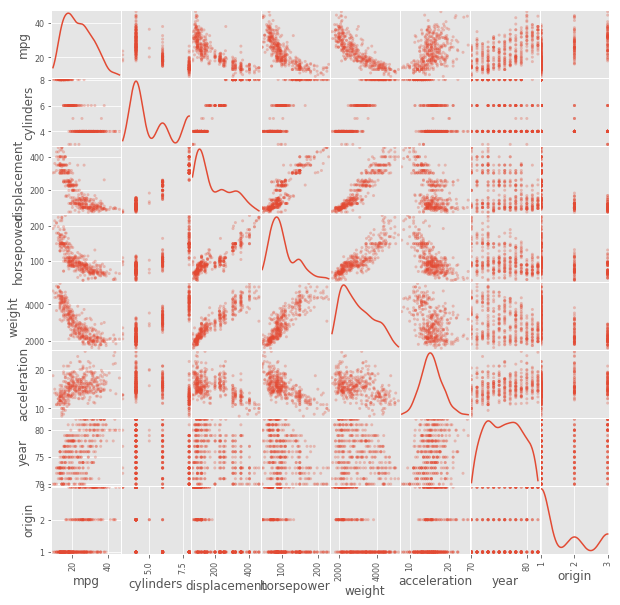

In [43]:
from pandas.plotting import scatter_matrix
scatter_matrix(auto, alpha=0.3, figsize=(10, 10), diagonal='kde')
plt.show()

### 1C)

In [44]:
auto.corr()

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin
mpg,1.000000,-0.777618,-0.805127,-0.778427,-0.832244,0.423329,0.580541,0.565209
cylinders,-0.777618,1.000000,0.950823,0.842983,0.897527,-0.504683,-0.345647,-0.568932
displacement,-0.805127,0.950823,1.000000,0.897257,0.932994,-0.543800,-0.369855,-0.614535
horsepower,-0.778427,0.842983,0.897257,1.000000,0.864538,-0.689196,-0.416361,-0.455171
weight,-0.832244,0.897527,0.932994,0.864538,1.000000,-0.416839,-0.309120,-0.585005
acceleration,0.423329,-0.504683,-0.543800,-0.689196,-0.416839,1.000000,0.290316,0.212746
year,0.580541,-0.345647,-0.369855,-0.416361,-0.309120,0.290316,1.000000,0.181528
origin,0.565209,-0.568932,-0.614535,-0.455171,-0.585005,0.212746,0.181528,1.000000


### 1D)

In [45]:
auto['const']=1
reg1 = sm.OLS(endog=auto['mpg'], exog=auto[['const', 'cylinders' ,'displacement','horsepower','weight','acceleration','year','origin']], missing='drop')
results1 = reg1.fit()
type(reg1)
print(results1.summary())

                            OLS Regression Results                            
Dep. Variable:                    mpg   R-squared:                       0.821
Model:                            OLS   Adj. R-squared:                  0.818
Method:                 Least Squares   F-statistic:                     252.4
Date:                Sun, 04 Feb 2018   Prob (F-statistic):          2.04e-139
Time:                        15:43:19   Log-Likelihood:                -1023.5
No. Observations:                 392   AIC:                             2063.
Df Residuals:                     384   BIC:                             2095.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const          -17.2184      4.644     -3.707   

I) Origin, weight, and year are significant at the 1% level

II) Cylinders, acceleration, and horsepower are not significant at the 10% level

III) Year has a positive relationship with MPG. That is a one year increase results in a predicted 0.75 unit increase in miles per gallon.

### 1D)

In [46]:
auto['displacement_squared'] = auto['displacement']*auto['displacement']
auto['horsepower_squared'] = auto['horsepower']*auto['horsepower']
auto['weight_squared'] = auto['weight']*auto['weight']
auto['acceleration_squared'] = auto['acceleration']*auto['acceleration']

auto['constant'] = 1
regression = sm.OLS(endog=auto['mpg'], exog=auto[['constant', 'cylinders', 'displacement', \
                                              'displacement_squared', 'horsepower',\
                                              'horsepower_squared', 'weight', 'weight_squared',\
                                              'acceleration_squared','acceleration',\
                                             'year', 'origin']], missing='drop')
results2 = regression.fit()
print(results2.summary())

                            OLS Regression Results                            
Dep. Variable:                    mpg   R-squared:                       0.870
Model:                            OLS   Adj. R-squared:                  0.866
Method:                 Least Squares   F-statistic:                     230.2
Date:                Sun, 04 Feb 2018   Prob (F-statistic):          1.75e-160
Time:                        15:43:19   Log-Likelihood:                -962.02
No. Observations:                 392   AIC:                             1948.
Df Residuals:                     380   BIC:                             1996.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
constant                20.1084 

### 1E)

In [47]:
print("The adjusted r^2 = {}".format(results2.rsquared_adj))
if results2.rsquared_adj > results1.rsquared_adj:
    print("It's better than the adjusted r2: {} in part d".format(results1.rsquared_adj))
else:
    print("It's worse than the adjusted r^2: {} in part d".format(results1.rsquared_adj))

The adjusted r^2 = 0.8657483569790392
It's better than the adjusted r2: 0.8182237705835792 in part d


#### III) Displacement is no longer statistically signifcant and neither is Displacement squared
#### IV) Cylinders remained not significant, although the coefficient is positive now.

### 1F

In [48]:
prediction = results2.predict(exog=[1, 6, 200, 200**2, 100, 100**2, 3100, 3100**2, 15**2, 15, 99, 1])

print("The predicted miles per gallon mpg of a car with \
6 cylinders, displacement of 200, horsepower of 100, a weight of 3100, \
acceleration of 15.1, model year of 1999, and origin of 1 is:\n", prediction, "miles per gallon.")

The predicted miles per gallon mpg of a car with 6 cylinders, displacement of 200, horsepower of 100, a weight of 3100, acceleration of 15.1, model year of 1999, and origin of 1 is:
 [ 38.76772272] miles per gallon.


### 2

In [49]:
# Make a dataframe
table = {'x1' : [0, 2, 0 , 0, -1, 1],
        'x2' : [3, 0, 1, 1, 0, 1], 
        'x3' : [0, 0, 3, 2, 1, 1], 
        'y' : ['r', 'r', 'r', 'g', 'g', 'r']}

table

knn = pd.DataFrame(data = table)

# add column
knn['e_dist'] = np.sqrt(knn['x1']**2 + knn['x2']**2 + knn['x3']**2) # how is this equation formed?
knn.loc[:,'y':'e_dist']

,y,e_dist
0,r,3.000000
1,r,2.000000
2,r,3.162278
3,g,2.236068
4,g,1.414214
5,r,1.732051



#### 2B) At k = 1, whatever point is closest to 0,0,0 would indicate the color. Observation four is the closest to 0, and has the lwoest euclidean distance. Observation four is GREEN, therefore we predict green.

#### 2C) The three with the lowest distance are 1, 4, and 5. Of these three 2/3 are Red so the answer is Red

#### 2D) Because the data is non-linear, we will be better if have a small k. That is, a lower k will gurantee a higher predictive accuracy.

In [50]:
# 2E).
y = knn['y'] 
x = np.column_stack((knn['x1'], knn['x2'], knn['x3']))
knn_classifier = sklearn.neighbors.KNeighborsClassifier(n_neighbors=2)# k = 2 
results3 = knn_classifier.fit(x, y)
print(results3.predict([(1, 1, 1)])) # X1 = 1, X2 = 1, X3 = 1 

print("The expected result of k=2 is green")

['g']
The expected result of k=2 is green


In [51]:
auto = pd.read_csv("Auto.csv", na_values = "?")
auto['const']=1
# create a new var equals 1 if mpg_high = median(mpg high) and equals 0 if mpg_high< median(mpg high)

mpgmedian= auto['mpg'].median()
auto['mpg_high'] = auto['mpg'].apply(lambda x: 1 if x >= mpgmedian else 0) #conditional to add 1 and 0s

## 3

### 3A

In [68]:
auto = pd.read_csv("Auto.csv", na_values = "?")
auto['const']=1
# create a new var equals 1 if mpg_high = median(mpg high) and equals 0 if mpg_high< median(mpg high)

mpgmedian= auto['mpg'].median()
auto['mpg_high'] = auto['mpg'].apply(lambda x: 1 if x >= mpgmedian else 0) #conditional to add 1 and 0s

In [69]:
LogitModel = sm.Logit(auto['mpg_high'], auto[['const', 'cylinders', 'displacement', 'horsepower', 'weight', 
                                       'acceleration', 'year', 'origin']], missing = 'drop')

In [70]:
LogitReg_sm = LogitModel.fit()
LogitReg_sm.summary()

Optimization terminated successfully.
         Current function value: 0.200944
         Iterations 9


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:               mpg_high   No. Observations:                  392
Model:                          Logit   Df Residuals:                      384
Method:                           MLE   Df Model:                            7
Date:                Sun, 04 Feb 2018   Pseudo R-squ.:                  0.7101
Time:                        16:31:18   Log-Likelihood:                -78.770
converged:                       True   LL-Null:                       -271.71
                                        LLR p-value:                 2.531e-79
================================================================================
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
const          -17.1549      5.764     -2.976      0.003     -28.452      -5.858
cylinders       -0.1626      0.423     -0.384      0.701      -0.992       0.667
displacement     0.0021      0.012      0.174      0.862      -0.021       0.026
horsepower      -0.0410      0.024     -1.718      0.086      -0.088       0.006
weight          -0.0043      0.001     -3.784      0.000      -0.007      -0.002
acceleration     0.0161      0.141      0.114      0.910      -0.261       0.293
year             0.4295      0.075      5.709      0.000       0.282       0.577
origin           0.4773      0.362      1.319      0.187      -0.232       1.187
================================================================================

Possibly complete quasi-separation: A fraction 0.14 of observations can be
perfectly predicted. This might indicate that there is complete
quasi-separation. In this case some parameters will not be identified.
"""

#### Weight and year are both significant with P-values of .000. The constant is also significant 

### 3b)

In [71]:
auto = auto.dropna(axis = 0, how = 'any')

y = auto['mpg_high']
X = np.column_stack((auto['const'],auto['cylinders'], auto['displacement'], auto['weight'], auto['horsepower'],
                     auto['acceleration'], auto['year'], auto['origin'])) 


#split the data
X_train, X_test, y_train, y_test = \
train_test_split(X, y, test_size = 0.5, random_state=10)
X

array([[   1. ,    8. ,  307. , ...,   12. ,   70. ,    1. ],
       [   1. ,    8. ,  350. , ...,   11.5,   70. ,    1. ],
       [   1. ,    8. ,  318. , ...,   11. ,   70. ,    1. ],
       ..., 
       [   1. ,    4. ,  135. , ...,   11.6,   82. ,    1. ],
       [   1. ,    4. ,  120. , ...,   18.6,   82. ,    1. ],
       [   1. ,    4. ,  119. , ...,   19.4,   82. ,    1. ]])

### 3C)

In [72]:
LogReg = LogisticRegression()
results5 = LogReg.fit(X_train, y_train)
print('The intercept is',results5.intercept_[0])
print('The coefficients are', results5.coef_[0])

The intercept is -0.0304373171664
The coefficients are [ -3.04373172e-02  -3.15786653e-01   2.37433412e-04  -4.92219570e-03
  -5.25624878e-02  -1.79506398e-01   3.09166947e-01  -9.01801042e-02]


### 3D) 

In [73]:
from sklearn.metrics import confusion_matrix
y_pred = LogReg.predict(X_test)
confusion_matrix = confusion_matrix(y_test, y_pred)
confusion_matrix

array([[86, 13],
       [12, 85]], dtype=int64)

In [74]:
print(classification_report(y_test, y_pred))

             precision    recall  f1-score   support

          0       0.88      0.87      0.87        99
          1       0.87      0.88      0.87        97

avg / total       0.87      0.87      0.87       196



The model predicts higher MPG slightly better, although the model predicts both etremely similar. 